# QBIO 401: Introduction to Computational Analysis of Biological Data 

# DNA sequencing II

## 1. Read and process FASTQ file

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
def loadFASTQ(fname):
    sequence = [] # extract 100,000 DNA sequences
    quality = [] # extract 100,000 quality scores
    
    with open(fname, "r") as infile:
        idx = 0
        for line in infile:
            if idx % 4 == 1: # for first line
                sequence.append(line.strip())
                
            elif idx % 4 == 3: # for forth line
                quality.append(line.strip())
            
            idx = idx + 1
            
    return sequence, quality

## 2. Calculate quality score

In [8]:
def calQualScore(quality):
    height = len(quality)
    width = len(quality[0])
    
    qscore = np.zeros([height, width], dtype=int) # 100,000 * 37
    
    for i in range(height): # 100,00
        for j in range(width): # 37
            qscore[i][j] = int(ord(quality[i][j])-33)
            
    return qscore

In [9]:
fname_good = "/Users/nicktidow/Downloads/XI1_ATCACG_L001_R1_001.fastq"
fname_bad = "/Users/nicktidow/Downloads/XI1_ATCACG_L001_R1_001.fastq"

# load FASTQ file
sequence_good, quality_good = loadFASTQ(fname_good)
sequence_bad, quality_bad = loadFASTQ(fname_bad)

# convert quality chars to quality score
qscore_good = calQualScore(quality_good)
qscore_bad = calQualScore(quality_bad)

# basic statistics
print(np.average(qscore_good))
print(np.std(qscore_good))
print(np.average(qscore_bad))
print(np.std(qscore_bad))

34.4983156
9.968056438584034
34.4983156
9.968056438584034


## 3. Visulize the results

### 3.1. All base quality score
#### *for good one*

<IPython.core.display.Javascript object>


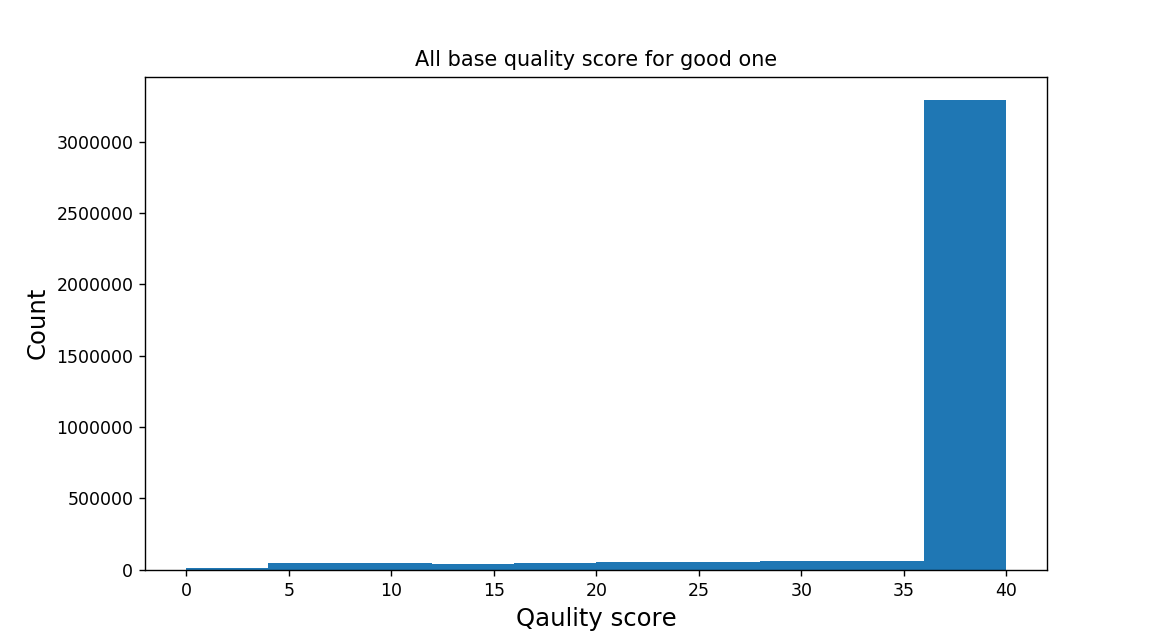

Text(0.5, 1.0, 'All base quality score for good one')

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

qscore_flat_good = qscore_good.flatten()
p1 = plt.hist(qscore_flat_good)

plt.xlabel("Qaulity score", size=14)
plt.ylabel("Count", size=14)
plt.title("All base quality score for good one")

#### *for bad one*

<IPython.core.display.Javascript object>


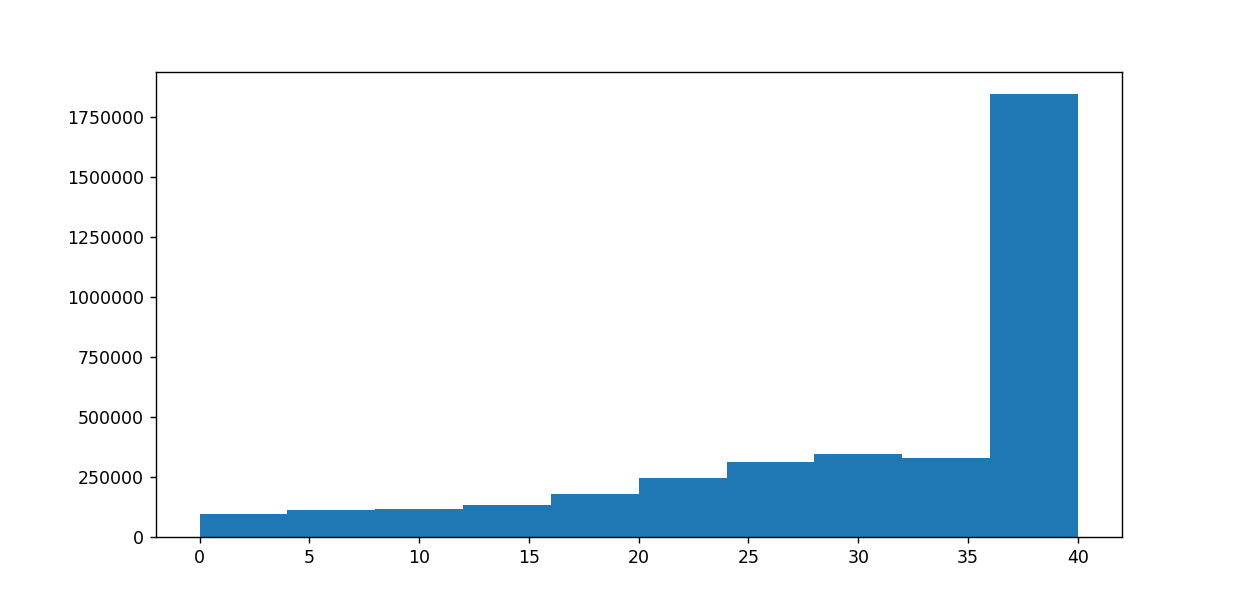

In [16]:
qscore_flat_bad = qscore_bad.flatten()
p2 = plt.hist(qscore_flat_bad)

### 3.2. Per base quality score
#### *for good one*

<IPython.core.display.Javascript object>


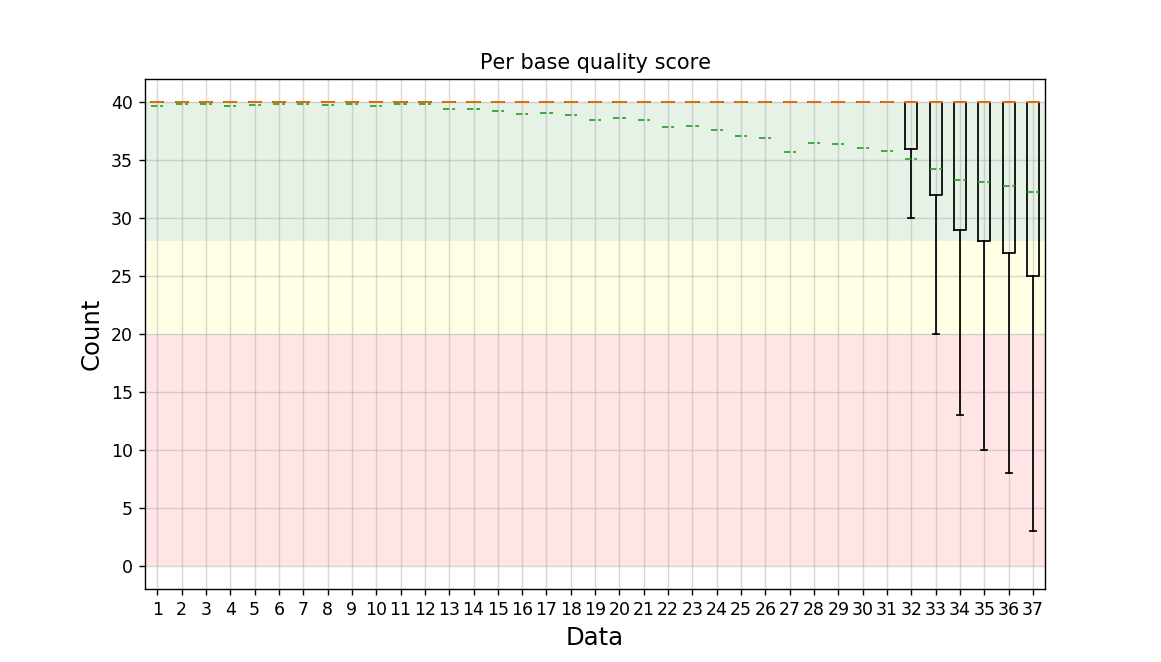

Text(0.5, 1.0, 'Per base quality score')

In [18]:
p3 = plt.boxplot(qscore_good, showfliers=False, showmeans=True, meanline=True)

plt.grid(alpha=0.5)
plt.axhspan(28, 40, facecolor='green', alpha=0.1)
plt.axhspan(20, 28, facecolor='yellow', alpha=0.1)
plt.axhspan(0, 20, facecolor='red', alpha=0.1)

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Per base quality score")

<IPython.core.display.Javascript object>


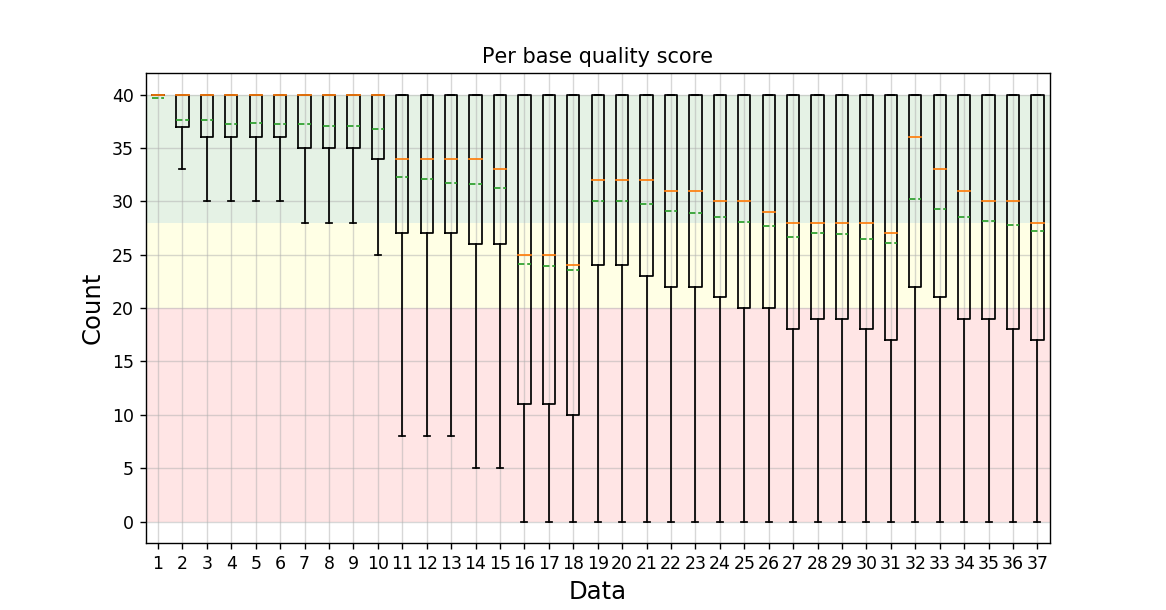

Text(0.5, 1.0, 'Per base quality score')

In [19]:
p4 = plt.boxplot(qscore_bad, showfliers=False, showmeans=True, meanline=True)

plt.grid(alpha=0.5)
plt.axhspan(28, 40, facecolor='green', alpha=0.1)
plt.axhspan(20, 28, facecolor='yellow', alpha=0.1)
plt.axhspan(0, 20, facecolor='red', alpha=0.1)

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Per base quality score")